## Shopify DS Intern Challenge

In [ ]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style='whitegrid')
fontTitledict={'fontsize':12,'weight':'bold','horizontalalignment':'center'}

In [2]:
df = pd.read_csv('./data/2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')

In [3]:
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


In [9]:
min(df['created_at'])

'2017-03-01 0:08:09'

In [10]:
max(df['created_at'])

'2017-03-30 9:55:00'

Text(0, 0.5, 'Frequency')

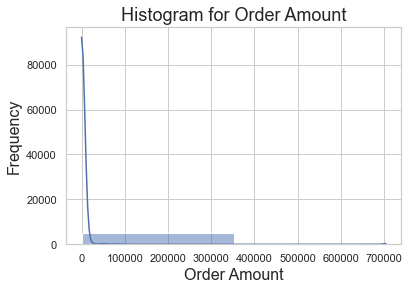

In [28]:
sns.histplot(df['order_amount'], kde=True, bins=2)
plt.title('Histogram for Order Amount', fontsize=18)
plt.xlabel('Order Amount', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

In [34]:
print('Percentile for Order Amount')
print('=' * 50)
for i in range(0,100,10):
    var = df["order_amount"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

Percentile for Order Amount
0 percentile value is 90
10 percentile value is 133
20 percentile value is 156
30 percentile value is 176
40 percentile value is 236
50 percentile value is 284
60 percentile value is 322
70 percentile value is 356
80 percentile value is 444
90 percentile value is 531
100 percentile value is  704000


In [35]:
print('90 - 100 Percentile for Order Amount')
print('=' * 50)
for i in range(90,100):
    var = df["order_amount"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

90 - 100 Percentile for Order Amount
90 percentile value is 531
91 percentile value is 536
92 percentile value is 561
93 percentile value is 580
94 percentile value is 596
95 percentile value is 640
96 percentile value is 692
97 percentile value is 712
98 percentile value is 804
99 percentile value is 25725
100 percentile value is  704000


In [37]:
print(f"Average Order Value : {df['order_amount'].mean()}")

Average Order Value : 3145.128


In [38]:
print(f"Median Order Value : {df['order_amount'].median()}")

Median Order Value : 284.0


<b>Q1 a.</b> As we can see from the percentile value of order_amount, we see that about 98 percentile is around 800. However, there are lot of outlier for 98-100 percentile range.
This skewed distribution values significantly impact the Average order value calulation. These outlier values might be source of incorrect data entries or some of the 
rare and limited edition might actually sell for that kind of range.

<b>Q1 b.</b> As the order value data has highly skewed values, if we are interested to know how much an average customer spends on sneakers, we can use the median (50th percentile)
order value as another metric. This metric is robust to outlier values.

<b>Q1 c.</b> The median value of order_amount is 284.0

<b>Q2 a.</b> Ans 54

In [ ]:
SELECT COUNT(s.ShipperName) AS total_orders
FROM Orders o
INNER JOIN Shippers s
	ON o.ShipperID = s.ShipperID
WHERE s.ShipperName = 'Speedy Express';

<b>Q2 b.</b> Ans Peacock

In [ ]:
SELECT 
    Lastname
FROM
(SELECT
	EmployeeID,
    MAX(total_orders)
FROM
(SELECT 
	EmployeeID,
    COUNT(EmployeeID) AS total_orders
FROM Orders
	GROUP BY EmployeeID) employee_to_orders) max_order_employee
INNER JOIN Employees e
    ON e.EmployeeID = max_order_employee.EmployeeID;

<b>Q2.c </b> Ans Gorgonzola Telino

In [ ]:
SELECT
	ProductName
FROM (SELECT 
	p.ProductID,
    p.ProductName,
    MAX(total_num_orders)
FROM
(SELECT 
      ProductID,
      COUNT(ProductID) AS total_num_orders
  FROM
    (SELECT *
    FROM Orders o
    INNER JOIN
      (SELECT CustomerID,
            Country
      FROM Customers
      WHERE Country = 'Germany') germany_customers
    ON o.CustomerID = germany_customers.CustomerID
    JOIN OrderDetails od
    ON od.OrderID = o.OrderID) order_to_product
  GROUP BY ProductID) product_to_total_orders
  JOIN Products p
  ON p.ProductID = product_to_total_orders.ProductID) max_product